# Exploratory Data Analysis

In this section, I am going to analyze the relationship between the book features in my dataset and the target of my future predictions, 'rating.'

Therefore, I will explore how rating is affected by isolated and grouped features, and I will especially focus on the newly extracted variables 'genres' and 'awards' to check if the new structure makes them better predictors for 'rating'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import clean data
gr_data = pd.read_csv('./2. Clean_df/gr_data_CLEAN.csv')
gr_data = gr_data.drop(['Unnamed: 0'],axis=1)

In [4]:
pd.set_option('display.max_columns', 1000)
display(gr_data.head(3), gr_data.shape)

,title,series,author,description,language,pages,isbn,book_format,publish_year,first_publish_year,publisher,liked_perc,bbe_score,bbe_votes,log_num_ratings,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,rating,fantasy,science fiction,dystopia,young adult,fiction,action,adventure,romance,magic,children,audiobook,school,classics,historical fiction,novels,literature,historical,historical romance,adult,urban fantasy,paranormal,paranormal romance,vampires,holocaust,war,politics,christian fiction,christianity,epic fantasy,civil war,love,drama,coming of age,contemporary,comedy,humor,poetry,picture books,short stories,gothic,mystery,thriller,suspense,crime,mystery thriller,asian countries,asia,horror,european literature,european countries,plays,esoterica,philosophy,self help,inspirational,mental health,north american countries,angels,chick lit,animals,chapter books,magical realism,time travel,iberoamerican literature,fairy tales,greek mythology,mythology,dragons,epic,monsters,gastronomy,food and nutrition,feminism,unfinished,music and musicians,medieval,apocalyptic,detective,victorian,mental illness,psychology,family,african american literature,new york,religion,ireland,nonfiction,history,memoires and biographies,eastern religions and faith,africa,steampunk,economics,contemporary romance,womens,lgtbi and queer,young adult fantasy,travel,young adult contemporary,storytime,mathematics,counting,true crime,cats,westerns,superheroes,graphic novel and comics,world war i,australia,christmas,science,arthurian,banned books,pirates,erotica,prehistoric,witches,retellings,asian literature,tudor period,media tie in,dinosaurs,religion studies,werewolves,portugal,southern,southern gothic,journalism,race,speculative fiction,survival,college,tragedy,african countries,ancient history,abuse,guides and travel,the united states of america,reference,space,military fiction,anthologies,childrens classics,essays,cyberpunk,fae,african literature,legal thriller,physics,death,music,islam,ghosts,regency,germany,collections,judaism,true story,aliens,law,biology,evolution,anthropology,political science,futuristic,french revolution,alternate history,american history,christian romance,robots,ancient,dark,fairies,folklore,zombies,education,demons,mountaineering,sports,medical,medicine,theory,academic,unicorns,business,leadership,new age,personal development,horse racing,american civil war,espionage,social justice and activism,astronomy,american revolution,presidents,gender,greece,nobel prize,noir,native americans,writing,love story,sociology,business and finance,social science,health,disability,halloween,communication,relationships,aviation,romanticism,israel,european history,productivity,management,fighters,psychological thriller,mythology and fairy tales,outdoors,murder mystery,shapeshifters,marriage,architecture,animal fiction,m m romance,south american countries,fashion,programming and computer science,cults,weird fiction,lovecraftian,cultural,dark fantasy,north american literature,historical mystery,batman,americana,genetics,romantic suspense,emotion,womens fiction,new weird,hugo awards,diary and journal,buisness,sports romance,polygamy,entrepreneurship,money,personal finance,baseball,young adult paranormal,crafts,spy thriller,elves,plants,police,archaeology,gardening,historical fantasy,conspiracy theories,world history,medieval history,military history,ecology,sustainability,technology,gaming,utopia,linguistics,rabbits,manga,comic fantasy,ghost stories,amazon,poverty,parenting,hard boiled,aspergers,social,nordic noir,gender studies,wildlife,anime,shojo,counter culture,illness,time travel romance,young adult historical fiction,cartoon,artificial intelligence,heroic fantasy,forgotten realms,dragonlance,amish,modern,geography,doctors,chess,martial arts,engineering,pop culture,pulp,wizards,adoption,hockey,teaching,boarding school,star wars,fitness,fantasy romance,natural history,fan fiction,mermaids,society,mormonism

(48655, 862)

In [5]:
# Adding column of sum of total star votes
gr_data['total_star_votes'] = gr_data[["5_stars_num_ratings",
                                       "4_stars_num_ratings",
                                       "3_stars_num_ratings",
                                       "2_stars_num_ratings",
                                       "1_star_num_ratings"]].sum(axis=1)
gr_data['total_star_votes']

0        6376780
1        2507623
2        4501075
3        2998241
4        4964519
          ...   
48650       1028
48651         37
48652       6674
48653        238
48654        246
Name: total_star_votes, Length: 48655, dtype: int64

## Exploratory Data Analysis

#### Target to predict: rating

In [6]:
gr_data.rating.describe()

count    48655.000000
mean         4.015514
std          0.347446
min          0.000000
25%          3.820000
50%          4.020000
75%          4.220000
max          5.000000
Name: rating, dtype: float64

#### Rating

Votes for stars ratings (from 5 stars to 1), votes and scores for registered users of GoodReads and rating.

I'm going to undo the logarithmic transformation in 'bbe_score' and 'bbe_votes' to proceed the analysis with the original data range.

In [7]:
ratingdf = gr_data[["title","5_stars_num_ratings", "4_stars_num_ratings", "3_stars_num_ratings",
                    "2_stars_num_ratings", "1_star_num_ratings", "total_star_votes",
                    "bbe_score","bbe_votes","rating"]]


# For easier analysis, I'm going to undo the log transformation in this subset
log_transformed_votes = ratingdf['bbe_votes']
original_votes = 10**(log_transformed_votes)
ratingdf['bbe_votes'] = original_votes

log_transformed_scores = ratingdf['bbe_score']
original_scores = 10**(log_transformed_scores)
ratingdf['bbe_score'] = original_scores

ratingdf.head()

/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_1570/1970143345.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratingdf['bbe_votes'] = original_votes
/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_1570/1970143345.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratingdf['bbe_score'] = original_scores


,title,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,total_star_votes,bbe_score,bbe_votes,rating
0,The Hunger Games,3444695,1921313,745221,171994,93557,6376780,2993816.0,30516.0,4.33
1,Harry Potter and the Order of the Phoenix,1593642,637516,222366,39573,14526,2507623,2632233.0,26923.0,4.50
2,To Kill a Mockingbird,2363896,1333153,573280,149952,80794,4501075,2269402.0,23328.0,4.28
3,Pride and Prejudice,1617567,816659,373311,113934,76770,2998241,1983116.0,20452.0,4.26
4,Twilight,1751460,1113682,1008686,542017,548674,4964519,1459448.0,14874.0,3.60


Aggregated values for grouped ratings (0 to 5)

In [28]:
# Group ratings from 0-5
bins = [-1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.1]
labels = ['0-1', '1', '2', '3', '4', '5']

# Bins as new column
ratingdf['rating_group'] = pd.cut(ratingdf['rating'], bins=bins, labels=labels, include_lowest=True)

# Groupbt rating_group column
grouped_ratings = ratingdf.groupby('rating_group')

# calculate the sum of each star rating for each group
star_ratings_sum = grouped_ratings[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings']].sum()

# add a new column to the DataFrame for the total number of star ratings
star_ratings_sum['total_star_ratings'] = star_ratings_sum.sum(axis=1)

# calculate the average of bbe_score and the sum of bbe_votes for each group
bbe_agg = grouped_ratings.agg({'bbe_score': 'mean', 'bbe_votes': 'sum'})

# join the two DataFrames on the 'rating_group' column
result_df = star_ratings_sum.join(bbe_agg, on='rating_group')
result_df

/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_1570/1137556383.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratingdf['rating_group'] = pd.cut(ratingdf['rating'], bins=bins, labels=labels, include_lowest=True)


,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,total_star_ratings,bbe_score,bbe_votes
rating_group,,,,,,,,
0-1,0,0,0,0,0,0,96.568182,46.0
1,19,7,10,11,130,177,95.666667,6.0
2,17215,31476,58592,52754,38525,198562,103.221154,128.0
3,69534207,83146603,63457321,20679670,9141899,245959700,1184.133572,232063.0
4,308336586,227131978,108713176,26148301,11666084,681996125,2680.674797,938826.0
5,4554,60,16,6,17,4653,118.141791,858.0


In [29]:
result_df.describe()

,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,total_star_ratings,bbe_score,bbe_votes
count,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000,6.000000
mean,6.298210e+07,5.171835e+07,2.870485e+07,7.813457e+06,3.474442e+06,1.546932e+08,713.067694,195321.166667
std,1.233742e+08,9.214507e+07,4.669385e+07,1.220725e+07,5.426653e+06,2.764182e+08,1056.455024,375857.978512
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,95.666667,6.000000
25%,1.152750e+03,2.025000e+01,1.150000e+01,7.250000e+00,4.525000e+01,1.296000e+03,98.231425,66.500000
50%,1.088450e+04,1.576800e+04,2.930400e+04,2.638250e+04,1.932750e+04,1.016075e+05,110.681472,493.000000
75%,5.215496e+07,6.236782e+07,4.760764e+07,1.552294e+07,6.866056e+06,1.845194e+08,917.635627,174261.750000
max,3.083366e+08,2.271320e+08,1.087132e+08,2.614830e+07,1.166608e+07,6.819961e+08,2680.674797,938826.000000


Plot for stars votes count vs 'rating' category of book.

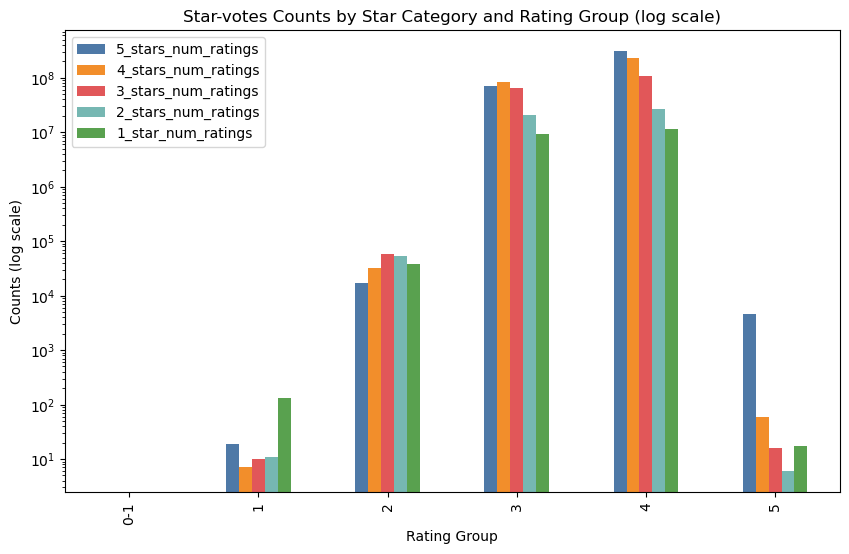

In [117]:
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']
# assuming your data is in a DataFrame called "result_df"
ax = result_df.plot(kind='bar', y=['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings'], figsize=(10, 6), log=True, color=colors)

ax.set_xlabel('Rating Group')
ax.set_ylabel('Counts (log scale)')
ax.set_title('Star-votes Counts by Star Category and Rating Group (log scale)')

plt.show()

Percentage of star-votes for each unique rating

In [26]:
percentage_df = result_df[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings']].div(result_df['total_star_ratings'], axis=0).mul(100)
percentage_df = percentage_df.fillna(0)
percentage_df['total_star_ratings'] = result_df['total_star_ratings']
percentage_df

,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,total_star_ratings
rating_group,,,,,,
0-1,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,10.734463,3.954802,5.649718,6.214689,73.446328,177
2,8.669836,15.851976,29.508164,26.568024,19.402000,198562
3,28.270569,33.804970,25.799886,8.407747,3.716828,245959700
4,45.210900,33.303998,15.940439,3.834084,1.710579,681996125
5,97.872340,1.289491,0.343864,0.128949,0.365356,4653


Percentage of star counts for each rating group.

In [37]:
result_t = result_df[['5_stars_num_ratings',
                      '4_stars_num_ratings',
                      '3_stars_num_ratings',
                      '2_stars_num_ratings',
                      '1_star_num_ratings',
                     'total_star_ratings']].T

# Calculate percentages for each row
result_t_pct = result_t.div(result_t.sum(axis=1), axis=0) * 100


# Round to two decimal places
#result_t_pct = result_t_pct.round(2)

result_t_pct

rating_group,0-1,1,2,3,4,5
5_stars_num_ratings,0.0,0.000005,0.004556,18.400522,81.593712,0.001205
4_stars_num_ratings,0.0,0.000002,0.010143,26.794679,73.195156,0.000019
3_stars_num_ratings,0.0,0.000006,0.034020,36.844712,63.121253,0.000009
2_stars_num_ratings,0.0,0.000023,0.112528,44.111226,55.776210,0.000013
1_star_num_ratings,0.0,0.000624,0.184802,43.853074,55.961419,0.000082
total_star_ratings,0.0,0.000019,0.021393,26.499731,73.478355,0.000501


Percentage of votes concentrated in group ratings 3 and 4:

In [50]:
total_stars_34 = round(result_t_pct.loc['total_star_ratings', ['3', '4']].sum(),2)
total_stars_34

99.98

In [131]:
import plotly.graph_objs as go

# Define darker colors
darker_colors = ['#2980B9', '#27AE60', '#F1C40F','#8E44AD','#6D4C41', '#E67E22', '#EC407A', '#1ABC9C']

# Get the column labels and values for the pie chart
labels = result_t_pct.columns.tolist()[1:] # Drop the '0-1' group
labels = ['Rating: '+str(label) for label in labels] # Change the label names
labels.sort(key=lambda x: int(x.split(': ')[1])) # Sort the labels by rating
values = result_t_pct.loc['total_star_ratings'].tolist()[1:] # Drop the '0-1' group

# Calculate the percentage of votes for ratings 3 and 4
votes_3_4_pct = round((result_t_pct.loc['total_star_ratings']['3'] + result_t_pct.loc['total_star_ratings']['4']), 2)

# Create the Plotly pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, marker=dict(colors=darker_colors), sort=False, textinfo='label+percent', hoverinfo='label+percent',textfont_size=14)])
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.update_layout(title='Total Star-votes Count for each Rating Group', title_font_size=20, title_x=0.5)
fig.add_annotation(x=0.5, y=-0.1, showarrow=False, text=f"Star-votes for books rated as 3 or 4 concentrates {votes_3_4_pct}% of votes", font=dict(size=14))
fig.show()


Total books with a rating of 5 and less than 3 votes:

In [143]:
# Filter the rows with rating==5 and total_star_ratings<=10
less_3 = ratingdf[(ratingdf['rating'] == 5) & (ratingdf['total_star_votes'] <= 2)]
count_less_3_votes = len(less_3)
count_less_3_votes

rate5 = ratingdf[(ratingdf['rating'] == 5)]
count_5 = len(rate5)

less_3_pct = round(count_less_3_votes/count_5,2)*100
less_3_pct

display(f"An {less_3_pct}% of books with a 5 'rating' received only 1 or 2 votes")

"An 83.0% of books with a 5 'rating' received only 1 or 2 votes"

In [80]:
display(f"An astonishing {total_stars_34}% of total votes are concentrated in books rated between 3 and 4.9"
        "(independently to the star category selected). Specially for books with a rating of 1 or 5, this means "
        "that each vote has much more impact on the average rating. Therefore, using these top categories to assess "
        "the quality or acceptance of a book may not be the best criteria.")


'An astonishing 99.98% of total votes are concentrated in books rated between 3 and 4.9(independently to the star category selected). Specially for books with a rating of 1 or 5, this means that each vote has much more impact on the average rating. Therefore, using these top categories to assess the quality or acceptance of a book may not be the best criteria.'

Plot for star votes and bbe votes and score

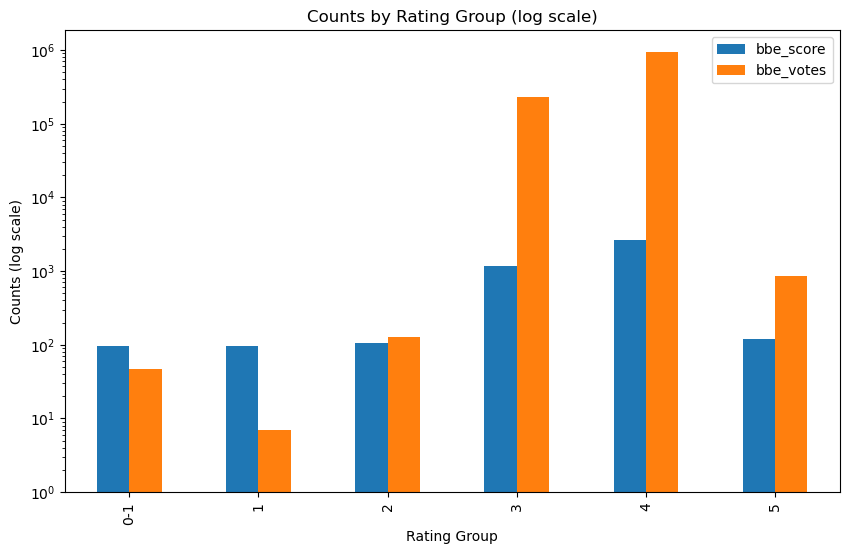

In [25]:
# As scales are so different, plot values are in log scale
ax = result_df.plot(kind='bar', y=['bbe_score', 'bbe_votes'], figsize=(10, 6), log=True)

ax.set_xlabel('Rating Group')
ax.set_ylabel('Counts (log scale)')
ax.set_title('Counts by Rating Group (log scale)')

plt.show()


#### Author

Top 20 rated authors

In [410]:
author_stats = gr_data.groupby('author').agg({'title': 'count', 'rating': 'mean'})
top_20_authors_rated = author_stats.sort_values(by='rating', ascending=False).head(20)
top_20_authors_rated

,title,rating
author,,
鄭丰,1,5.0
Appollonia Solange,1,5.0
E Lillian Volkmer,1,5.0
Shweta Jhajharia,1,5.0
Shivank Srivastava,1,5.0
Dudley Allen King III,1,5.0
Shihâboddîn Yahya Sohravardî,1,5.0
Jozef Rulof,1,5.0
Dr. Mildred Dumas,1,5.0


Top 20 most published authors

In [411]:
top_20_authors_published = author_stats.sort_values(by='title', ascending=False).head(20)
top_20_authors_published

,title,rating
author,,
James Patterson,95,3.978000
Stephen King,87,4.009425
Nora Roberts,84,4.070119
Agatha Christie,79,3.921013
Erin Hunter,75,4.360133
Anonymous,71,4.339296
Terry Pratchett,64,4.097500
Francine Pascal,61,3.637541
J.D. Robb,61,4.329344


#### Title

Top 20 rated books

In [147]:
num_books_rating_5 = sum(gr_data['rating'] == 5)
display(f"Number of books with a rating of 5: {num_books_rating_5} "
        f"(from which a {less_3_pct}% received only 1 or 2 votes.)")


'Number of books with a rating of 5: 635 (from which a 83.0% received only 1 or 2 votes.)'

In [132]:
top_20 = ratingdf.nlargest(20, 'rating')[['title', 'rating', 'total_star_votes','bbe_votes']]
top_20[['title', 'rating','total_star_votes','bbe_votes']]

,title,rating,total_star_votes,bbe_votes
3902,Gris Ange 2014,5.0,9,8.0
3921,Das geheimnis der blumen (DEU),5.0,8,8.0
4307,Obscured Darkness (Family Secrets #2),5.0,9,7.0
4995,Rosto Inacabado (Pequenos segredos alquímicos)...,5.0,8,6.0
5576,Females of Valor,5.0,0,5.0
6664,Patience's Love,5.0,10,4.0
8433,Abstraction In Theory - Laws Of Physical Trans...,5.0,6,3.0
8764,Le Poinçon « Pilot Edition »,5.0,7,3.0
10073,Of Just the Two of Us,5.0,15,3.0
10454,Liam: Midsummer's Magic Bonus Book,5.0,17,3.0


Once again, we can see that the number of votes received, even after adding the ones from Goodreads users, is too low compared to the total amount of votes.

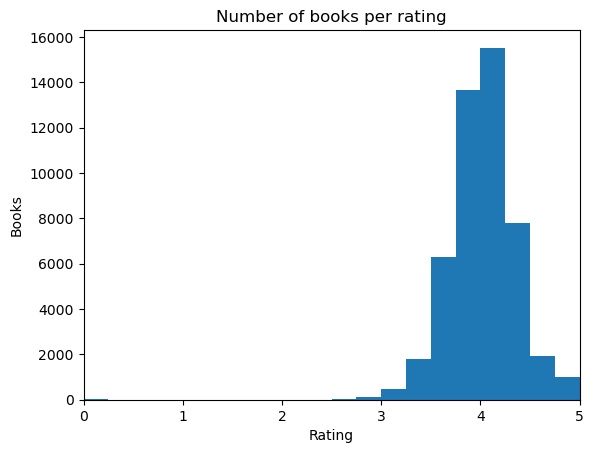

In [148]:
# Plot histogram number of books/Rating
plt.hist(gr_data['rating'], bins=20)
plt.xlim(0, 5)
plt.xlabel('Rating')
plt.ylabel('Books')
plt.title('Number of books per rating')
plt.show()

Number of books with 'rating' = 0 (not star votes, but some votes and scores from Goodreads users; somehow there seems to be two ways of voting).

In [155]:
rows_zero_ratings = ratingdf[ratingdf['rating'] == 0]#gr_data[0:20]
rows_zero_ratings.head()

,title,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,total_star_votes,bbe_score,bbe_votes,rating,rating_group
8113,Her Beauty,0,0,0,0,0,0,300.0,3.0,0.0,0-1
17561,Moon Secrets,0,0,0,0,0,0,100.0,1.0,0.0,0-1
17925,Aphrodisiac Concupiscence Deluxe,0,0,0,0,0,0,100.0,1.0,0.0,0-1
18122,The Equanimity Knowledge,0,0,0,0,0,0,100.0,1.0,0.0,0-1
18755,"The Sea of Skeleton Voices (Poetry, #7)",0,0,0,0,0,0,100.0,1.0,0.0,0-1


In [149]:
num_zero_ratings = gr_data[gr_data['rating'] == 0]['title'].count()
print(f"Number of titles with a rating of 0: {num_zero_ratings}")

Number of titles with a rating of 0: 44


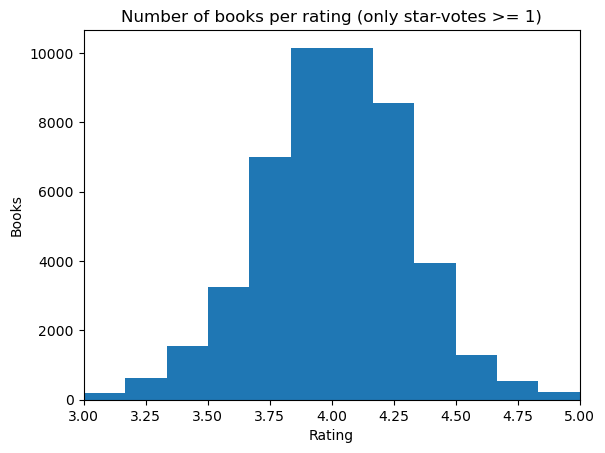

In [170]:
import matplotlib.pyplot as plt

# Filter out rows where total_star_votes = 0
ratingdf_filtered = ratingdf[ratingdf['total_star_votes'] >= 3]

# Plot histogram number of books/Rating
plt.hist(ratingdf_filtered['rating'], bins=20)
plt.xlim(3, 5)
plt.xlabel('Rating')
plt.ylabel('Books')
plt.title('Number of books per rating (only star-votes >= 1)')
plt.show()

Excluding the books that were only rated by GoodReads users, the data now appears to be more normally distributed.

#### Series

Do books that are part of a saga receive different ratings than standalone books?

In [171]:
# Group by 'series'
series_group = gr_data.groupby('series')

# Average rating for titles with a series value other than 'Single Book'
avg_rating_series = round(gr_data[gr_data['series'] != 'Single Book']['rating'].mean(), 2)

# Average rating for titles with a series value of 'Single Book'
avg_rating_single = round(gr_data[gr_data['series'] == 'Single Book']['rating'].mean(), 2)

print("Average rating for titles included in a series:", avg_rating_series)
print("Average rating for titles not included in any series:", avg_rating_single)

Average rating for titles included in a series: 4.07
Average rating for titles not included in any series: 3.99


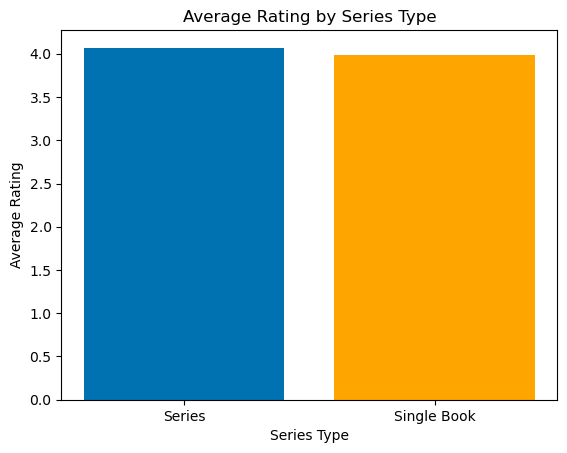

In [401]:
# Plot bar chart
plt.bar(['Series', 'Single Book'], [avg_rating_series, avg_rating_single], color=['#0072B2', 'orange'])

# Title and axis labels
plt.title('Average Rating by Series Type')
plt.xlabel('Series Type')
plt.ylabel('Average Rating')
plt.show()

Being part of a literary saga does not seem to significantly affect the average rating (+0.08).

Which are the series with the most published titles?

In [189]:
# Filter out 'Single books'
filtered = gr_data.loc[gr_data['series'] != 'Single Book']

# Calculate the average rating per series
series_avg_rating = filtered.groupby('series')['rating'].mean()

# Count the number of titles per series
series_title_counts = filtered.groupby('series').size()

# Create a DataFrame from the series_avg_rating and series_title_counts
df_avg_rating = pd.DataFrame({
    'series': series_avg_rating.index,
    'avg_rating': series_avg_rating.values,
    'title_count': series_title_counts.values
})

# Displaying top 20 rated literary series
top_20 = df_avg_rating.nlargest(20,'title_count')
top_20

,series,avg_rating,title_count
3029,Sweet Valley Kids,3.628571,56
2243,Nancy Drew Mystery Stories,3.906000,55
2665,Rogue Angel,3.785849,53
48,A Shade of Vampire,4.452857,49
2696,Saddle Club,3.784130,46
916,Discworld,4.161750,40
1578,In Death,4.327368,38
1455,Hercule Poirot,3.890909,33
2192,Morland Dynasty,4.247187,32
797,Dark-Hunter,4.251739,23


In [190]:
# Check if the series belong to any category in original df
categories = ['children', 'young adult', 'adult']

for category in categories:
    # If 1 then 'Yes', if 0 then 'No'
    df_avg_rating[category] = df_avg_rating['series'].apply(lambda x: 'Yes' if 1 in gr_data.loc[gr_data['series']==x][category].values else 'No')

top_20_most_published = df_avg_rating.nlargest(20,'title_count')
top_20_most_published


,series,avg_rating,title_count,children,young adult,adult
3029,Sweet Valley Kids,3.628571,56,Yes,No,No
2243,Nancy Drew Mystery Stories,3.906000,55,Yes,Yes,No
2665,Rogue Angel,3.785849,53,No,No,Yes
48,A Shade of Vampire,4.452857,49,No,Yes,No
2696,Saddle Club,3.784130,46,Yes,Yes,No
916,Discworld,4.161750,40,Yes,Yes,Yes
1578,In Death,4.327368,38,No,No,No
1455,Hercule Poirot,3.890909,33,No,No,Yes
2192,Morland Dynasty,4.247187,32,No,No,No
797,Dark-Hunter,4.251739,23,No,No,Yes


In [197]:
# Dictionaries to store counts of each category
counts = {category: 0 for category in categories}
total_series = 0
counted_series = set()

for index, row in df_avg_rating.iterrows():
    # Check if the series belongs to any category
    for category in categories:
        if row[category] == 'Yes':
            # Check if the series has already been counted
            if row['series'] not in counted_series:
                # This time counts the series and breaks out of the inner loop
                counts[category] += 1
                counted_series.add(row['series'])
                break
    total_series += 1

# Percentages for each category
category_percentages = {category: round((counts[category] / total_series) * 100, 2) for category in categories}

print("Percentage of series belonging to each category:")
for category in categories:
    print(category.title() + ': ' + str(category_percentages[category]) + '%')
    
# Check

Percentage of series belonging to each category:
Children: 14.33%
Young Adult: 29.06%
Adult: 26.68%


In [198]:
print(counts)
print(total_series)

{'children': 631, 'young adult': 1280, 'adult': 1175}
4404


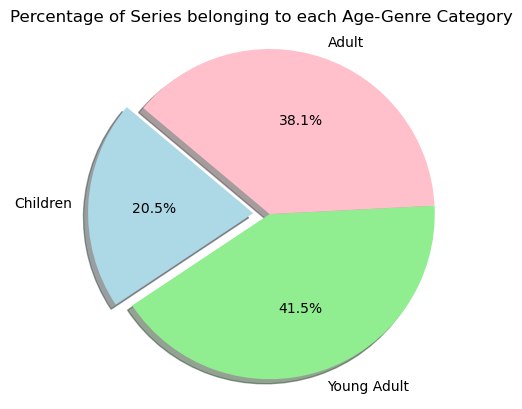

In [200]:
# Plot a pie chart to visualize the category percentages
labels = ['Children', 'Young Adult', 'Adult']
sizes = [category_percentages['children'], category_percentages['young adult'], category_percentages['adult']]
colors = ['lightblue', 'lightgreen', 'pink']
explode = (0.1, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Percentage of Series belonging to each Age-Genre Category')
plt.show()


As much as it seems that there is almost an equal number of sagas for "Adult" and "Young Adult", the reality is that more than 60% of the series in the dataset are intended for younger audiences.

In [ ]:
## mean rate for age category

#### Book Format

Does the book format influence the overall rating?

In [208]:
# Average rating for unique book_format
avg_rating_format = gr_data.groupby('book_format')['rating'].mean().round(2)

# Dataframe
df_avg_rating_format = pd.DataFrame({'book_format': avg_rating_format.index, 'avg_rating': avg_rating_format.values})

# New column to hold the count of books per format
df_avg_rating_format['title'] = gr_data.groupby('book_format').size().values

# Sort by rating
df_avg_rating_format.sort_values(by='avg_rating', ascending=False, inplace=True)

df_avg_rating_format

,book_format,avg_rating,title
2,Boxset,4.42,6
4,Graphic Novel and Comic,4.32,26
8,Special Edition,4.26,31
1,Boardbook,4.12,37
3,Ebook,4.10,7469
6,Other formats,4.10,32
0,Audio,4.04,176
7,Paperback,4.00,28859
5,Hardcover,3.99,11920
9,Unknown,3.95,99


More elaborate formats seem to have a higher rating.

In [209]:
# Mean of the 'avg_rating' column
avg_rating_mean = round(df_avg_rating_format['avg_rating'].mean(), 2)
print(f"Mean of 'avg_rating' column: {avg_rating_mean}")

Mean of 'avg_rating' column: 4.13


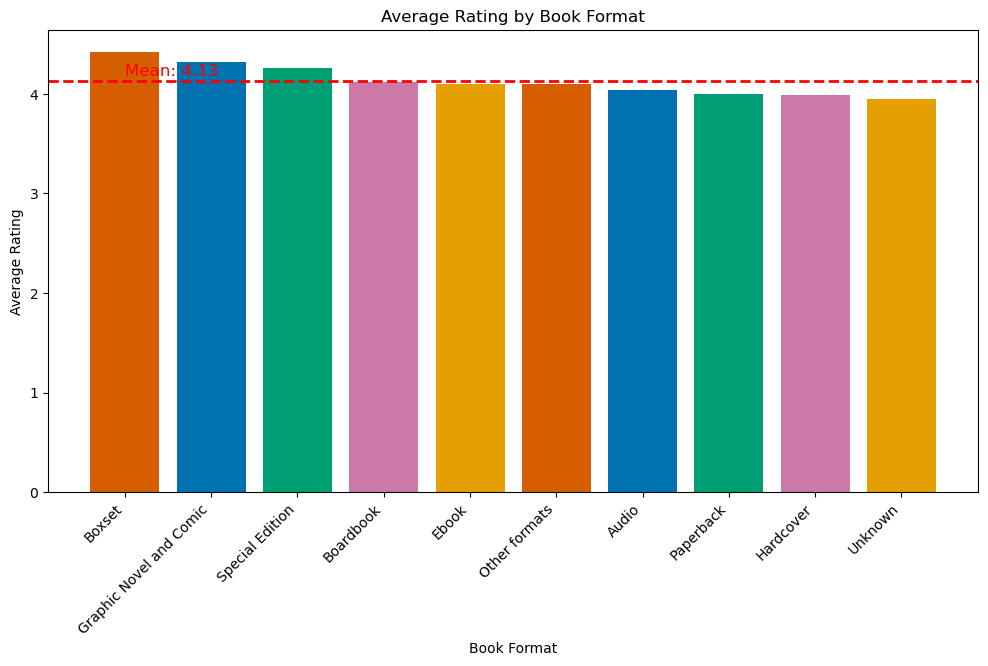

In [210]:
# Set figsize to (width, height) and colors
fig, ax = plt.subplots(figsize=(12, 6))  
ax.bar(df_avg_rating_format['book_format'], df_avg_rating_format['avg_rating'], color=['#D55E00', '#0072B2', '#009E73', '#CC79A7', '#E69F00'])

# Add a horizontal line for the mean of the 'avg_rating' column
ax.axhline(avg_rating_mean, color='red', linestyle='--', linewidth=2)

# Add a label for the mean value
ax.text(0, avg_rating_mean + 0.05, f'Mean: {avg_rating_mean:.2f}', color='red', fontsize=12)

# Set chart title and axis labels
ax.set_title('Average Rating by Book Format')
ax.set_xlabel('Book Format')
ax.set_ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

Indeed, more sophisticated book formats, such as 'Boxset', 'Graphic Novel and Comic', or 'Special Edition', have slightly above-average ratings compared to all book formats.

#### Language

In [212]:
gr_data['language'].nunique()

92

In [213]:
# Group by unique language and get count of titles and average rating
gr_language = gr_data.groupby('language').agg({'title': 'count', 'rating': 'mean'})

# Dataframe
df_language = pd.DataFrame({'language': gr_language.index, 'count': gr_language['title'], 'avg_rating': gr_language['rating']})

# Calculate percentage over total title count
df_language['percentage'] = round((df_language['count'] / df_language['count'].sum()) * 100, 2)

# Sort by count in descending order
df_language = df_language.sort_values('count', ascending=False)

df_language = df_language[['language','count','percentage','avg_rating']]

# Reset index and rename language column
df_language = df_language.reset_index(drop=True).rename(columns={'language': 'Language'})

df_language.head(20)


,Language,count,percentage,avg_rating
0,English,43415,89.23,4.021036
1,Arabic,894,1.84,3.862204
2,Spanish,632,1.30,3.979810
3,French,562,1.16,3.939698
4,German,501,1.03,3.960319
5,Portuguese,335,0.69,4.022746
6,Indonesian,239,0.49,3.951590
7,Italian,234,0.48,3.903974
8,Dutch,200,0.41,3.809300
9,Turkish,155,0.32,4.063355


Almost 90% of books in the GoodReads dataset are either written in English or are the translated editions. The imbalanced data distribution results in less variance of the mean rating for English-written books.

/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_1570/2643557451.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



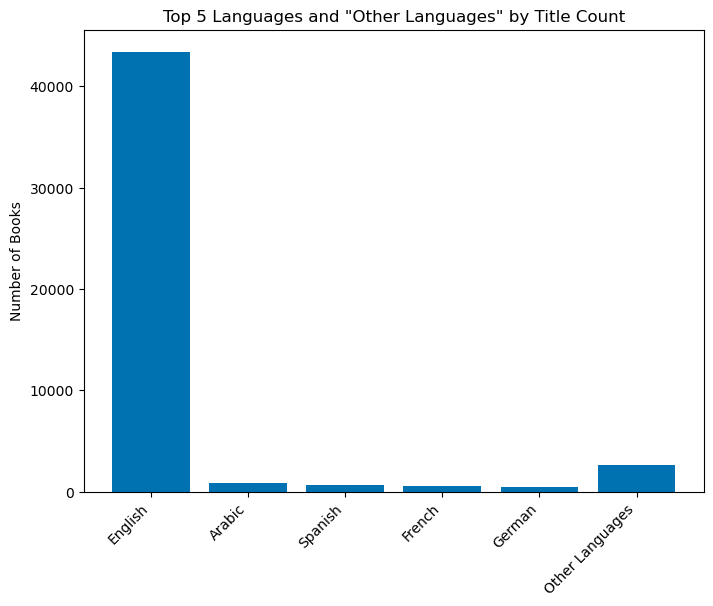

In [222]:
import matplotlib.pyplot as plt

# Get top 5 languages
top_languages = df_language.head(5)

# Create a new row for 'Other Languages'
other_languages = pd.DataFrame({
    'Language': ['Other Languages'],
    'count': [df_language['count'][5:].sum()],
    'percentage': [df_language['percentage'][5:].sum()],
    'avg_rating': [df_language['avg_rating'][5:].mean()]
})

# Concatenate the top 5 languages and 'Other Languages'
df_plot = pd.concat([top_languages, other_languages])

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(df_plot['Language'], df_plot['count'], color='#0072B2')
ax.set_xticklabels(df_plot['Language'], rotation=45, ha='right')
ax.set_ylabel('Number of Books')
ax.set_title('Top 5 Languages and "Other Languages" by Title Count')
plt.show()


Top languages and ratings: 

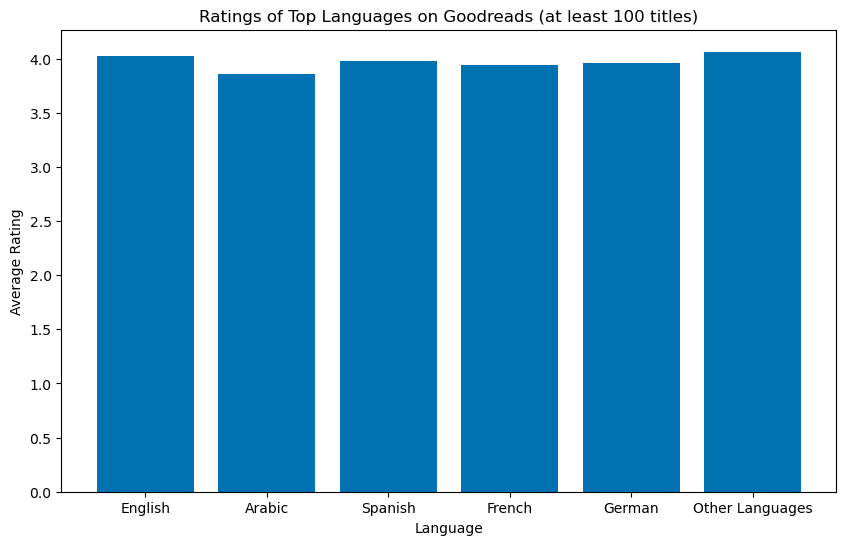

In [400]:
# Top languages with at least 100 titles
top_languages = df_language[df_language['count'] > 100].head(10)

# Bar plot
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(top_languages['Language'], top_languages['avg_rating'], color='#0072B2')

# Labels and title
ax.set_xlabel('Language')
ax.set_ylabel('Average Rating')
ax.set_title('Ratings of Top Languages on Goodreads (at least 100 titles)')

plt.show()

#### Pages

How does the number of pages in a book affect its rating?

In [229]:
# Group by 'pages' and calculate count and average rating
grouped_data = gr_data.groupby('pages').agg({'title': 'count', 'rating': 'mean'})
grouped_data = grouped_data.rename(columns={'title': 'count', 'rating': 'avg_rating'})

# Calculate percentage of books in each group
total_books = gr_data['title'].count()
grouped_data['percentage'] = grouped_data['count'].apply(lambda x: (x / total_books) * 100).round(2)

grouped_data = grouped_data.sort_values(by='avg_rating', ascending=False)

grouped_data = grouped_data[['count','percentage','avg_rating']]

grouped_data

,count,percentage,avg_rating
pages,,,
>1000,112,0.23,4.475268
900-1000,516,1.06,4.316473
800-900,215,0.44,4.247070
700-800,341,0.70,4.198006
600-700,643,1.32,4.153266
500-600,1119,2.30,4.127426
Unknown,3466,7.12,4.099010
400-500,2393,4.92,4.082863
300-400,5881,12.09,4.026616


At first glance, it seems that longer books have better scores

In [231]:
gr_data['pages'].unique()

array(['200-300', '700-800', '100-200', '400-500', '<100', '600-700',
       '900-1000', 'Unknown', '300-400', '500-600', '800-900', '>1000'],
      dtype=object)

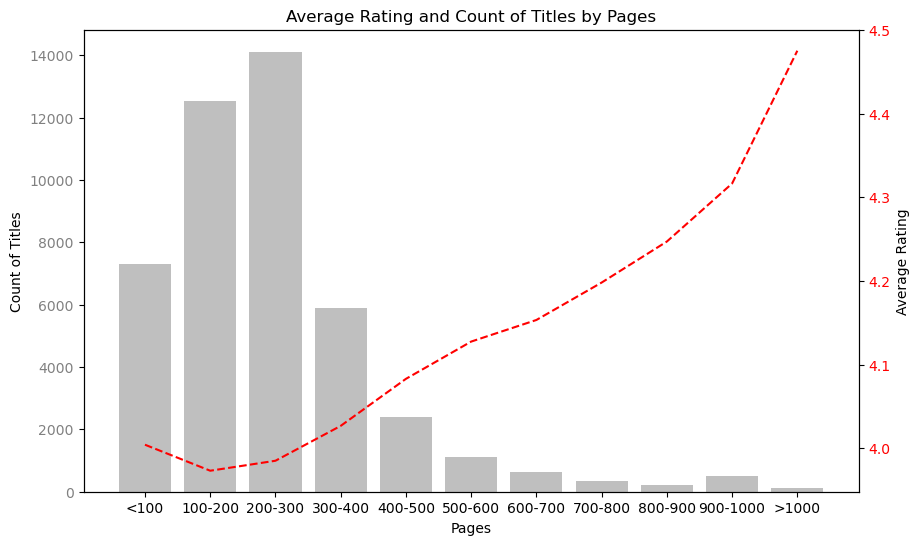

In [232]:
# Exclude 'unknown' category
grouped_data = grouped_data[grouped_data.index != 'unknown']

# Order for the x-axis categories
category_order = ['<100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '>1000']

# Figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bars for the count of titles
ax1.bar(category_order, grouped_data.loc[category_order, 'count'], color='gray', alpha=0.5)
ax1.set_xlabel('Pages')
ax1.set_ylabel('Count of Titles')
ax1.tick_params(axis='y', labelcolor='gray')

# Twin Axes for the line plot of the average rating
ax2 = ax1.twinx()
ax2.plot(category_order, grouped_data.loc[category_order, 'avg_rating'], color='red', linestyle='--')
ax2.set_ylabel('Average Rating')
ax2.tick_params(axis='y', labelcolor='red')

# Title
ax1.set_title('Average Rating and Count of Titles by Pages')

plt.show()

There appears to be a clear correlation between book length and rating, with longer books tending to receive higher ratings.

What is the relationship between the number of pages and the book format?

In [238]:
# Group by book format and calculate average pages, excluding 'unknown'
format_pages = gr_data.groupby(['book_format', 'pages'])['title'].count()
#format_pages

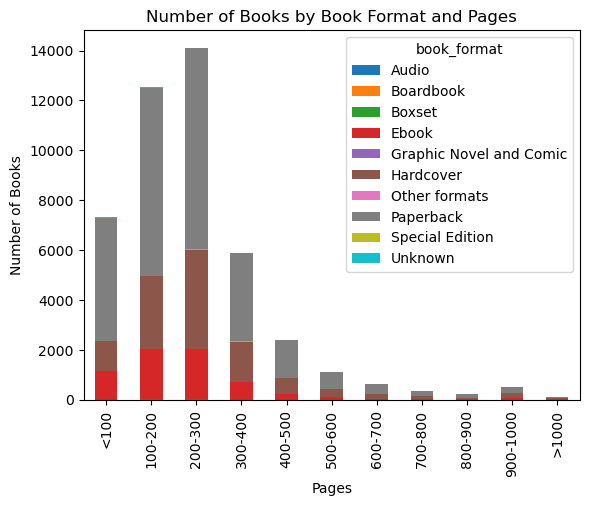

In [237]:
# Copy of the original dataframe to avoid modifying it
gr_data_filtered = gr_data[gr_data['pages'] != 'Unknown'].copy()

# Define category order for the x-axis
category_order = ['<100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '>1000']

# Create a categorical data type for the 'pages' column using the desired category order
page_categories = pd.api.types.CategoricalDtype(categories=category_order, ordered=True)
gr_data_filtered['pages'] = gr_data_filtered['pages'].astype(page_categories)

# Group by book format and pages, then count titles in each group
grouped = gr_data_filtered.groupby(['book_format', 'pages'])['title'].count().reset_index()

# Pivot the data so that book formats become columns and pages become rows
pivoted = grouped.pivot(index='pages', columns='book_format', values='title')

# Set the figure size
# plt.figure(figsize=(20,12))

# Plot the data as a stacked bar chart
pivoted.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Pages')
plt.ylabel('Number of Books')
plt.title('Number of Books by Book Format and Pages')

# Display the chart
plt.show()


## Publish year

In [241]:
grouped_data = gr_data.groupby('publish_year').agg({'title': 'count', 'rating': 'mean'})
grouped_data = grouped_data.rename(columns={'title': 'count', 'rating': 'avg_rating'})
grouped_data = grouped_data.sort_values(by='publish_year', ascending=False)
grouped_data.head(10)

,count,avg_rating
publish_year,,
2020,342,4.271111
2019,778,4.217879
2018,998,4.185030
2017,1264,4.133671
2016,1480,4.102291
2015,2118,4.082295
2014,2805,4.072228
2013,3112,4.033975
2012,3094,4.006147


In [244]:
gr_data['publish_year'].describe()

count    48655.000000
mean      2005.777495
std         10.747601
min       1821.000000
25%       2002.000000
50%       2008.000000
75%       2013.000000
max       2020.000000
Name: publish_year, dtype: float64

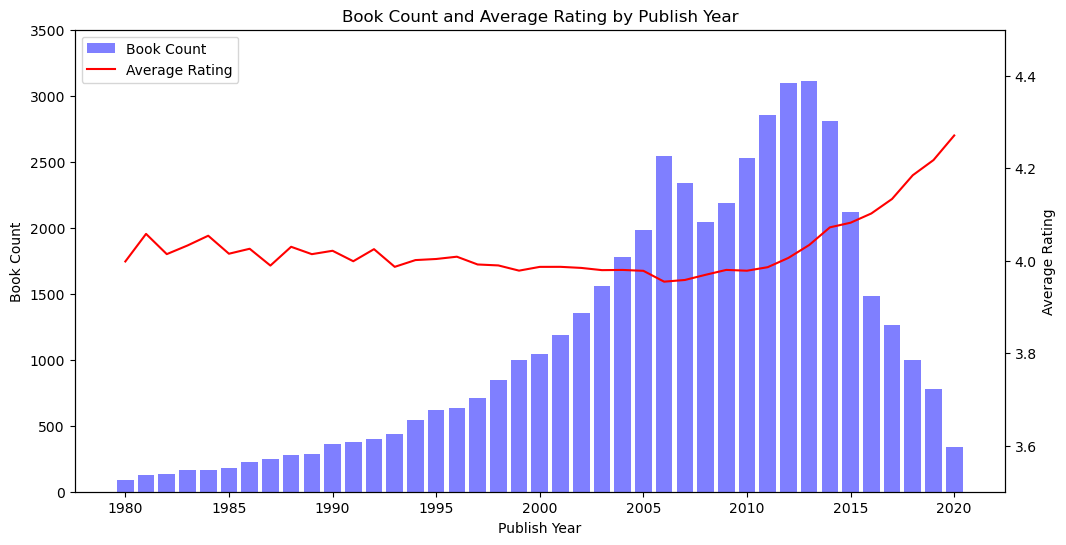

In [255]:
# Filter data for publish_year >= 1960
grouped_data_filtered = grouped_data[grouped_data.index >= 1980]

# Set figure size
plt.figure(figsize=(12, 6))

# Create first axis for book count data
ax1 = plt.gca()
ax1.bar(grouped_data_filtered.index, grouped_data_filtered['count'], color='b', alpha=0.5, label='Book Count')
ax1.set_xlabel('Publish Year')
ax1.set_ylabel('Book Count')
ax1.set_ylim(0, 3500)

# Create second axis for average rating data
ax2 = ax1.twinx()
ax2.plot(grouped_data_filtered.index, grouped_data_filtered['avg_rating'], color='r', label='Average Rating')
ax2.set_ylabel('Average Rating')
ax2.set_ylim(3.5, 4.5)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Add title
plt.title('Book Count and Average Rating by Publish Year')

# Show the plot
plt.show()


Despite the increase in the number of titles published during the period from 1980 to 2006, the average annual rating remains stable or even seems to decrease.

But starting from 2007 there is a growth in both the average rating and the number of books published the following years..

From 2015 onwards, however, this positive correlation becomes negative, as the average rating continues to increase and it seems that the new releases are no longer being included in this GoodReads catalog.

New books do indeed seem to receive better scores.

## Genres and awards

Since there are hundreds of columns with unique genres and awards, first I am going to export the dataframes where they are stored to retrieve the columns names.

In [305]:
# Importing dataframes
award_df = pd.read_csv('./0. Drafts/award_df.csv')
award_df = award_df.drop(['Unnamed: 0'],axis=1)
award_df = award_df.drop(['index_gr_data'],axis=1)

genres_df = pd.read_csv('./0. Drafts/genres_clean_dataset.csv')
genres_df = genres_df.drop(['Unnamed: 0'],axis=1)
genres_df = genres_df.drop(['index_gr_data'],axis=1)

In [306]:
# Length of genres
genres_columns = [column for column in genres_df.columns]
len(genres_columns)

609

In [307]:
# Length of awards
awards_columns = [column for column in award_df.columns]
len(awards_columns)

239

### Genres

In [308]:
### Solving typo
genres_columns = [col.replace('theatre', 'theater') for col in genres_columns]

Top genres ranked by the number of books of each type

In [309]:
# create an empty dataframe with genres as rows
genre_counts = pd.DataFrame(index=genres_columns)

# add 'counts' column to dataframe
genre_counts['counts'] = 0

# loop through each genre and count the number of books
for genre in genres_columns:
    try:
        genre_counts.at[genre, 'counts'] = gr_data[genre].sum()
    except:
        pass

# Rename 'theatre' to 'theater' in genre_counts dataframe
genre_counts = genre_counts.rename(index={'theatre': 'theater'})
# Sort by count
genre_counts.sort_values(by='counts', ascending=False, inplace=True)


In [310]:
genre_counts.head(10)

,counts
fiction,30687
romance,15210
fantasy,14374
young adult,11772
contemporary,10028
adult,9835
science fiction,9536
nonfiction,7940
mystery,7420
historical fiction,7359


Top rated genres

In [313]:
genre_counts['average_rating'] = 0

for genre in genres_columns:
    try:
        # select only rows where the genre has a value of 1
        genre_data = gr_data[gr_data[genre] == 1]
        
        # check if there are any books with this genre
        if genre_data.shape[0] != 0:
            # get the average rating for this genre
            avg_rating = genre_data['rating'].mean()
            genre_counts.at[genre, 'average_rating'] = avg_rating
    except:
        pass
    
genre_counts.sort_values(by='average_rating', ascending=False, inplace=True)

In [315]:
genre_counts.head(10)

,counts,average_rating
baha i,6,4.625000
cartoon,36,4.467500
graphic novels comics manga,2,4.450000
aircraft,4,4.425000
lie,2,4.380000
civil war history,4,4.370000
manhwa,8,4.356250
veganism and vegetarianism.1,1,4.350000
webcomic,16,4.339375
herbs,3,4.336667


A lower count of votes can once again lead to high-variance "rating" averages. However, canonical genres listed in more books are less prone to this effect

In [327]:
# Sort by count
genre_counts.sort_values(by='counts', ascending=False, inplace=True)
genre_counts.head(20)

,counts,average_rating
fiction,30687,3.966386
romance,15210,3.980773
fantasy,14374,4.009485
young adult,11772,3.986280
contemporary,10028,3.925012
adult,9835,3.973051
science fiction,9536,3.989557
nonfiction,7940,4.063096
mystery,7420,3.931636
historical fiction,7359,3.968448


Listed Vs Rated

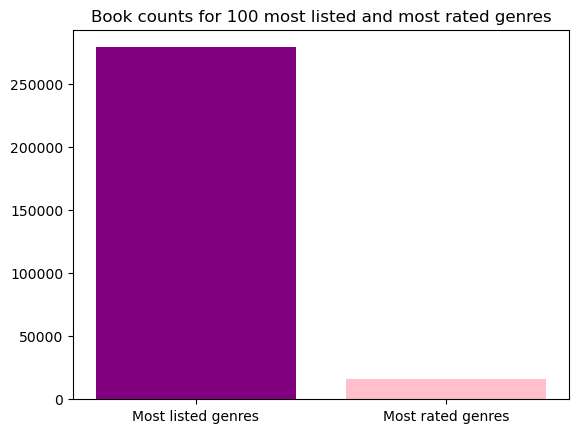

In [381]:
# Filter out 'fiction' and 'non_fiction' genres
genre_counts_filtered = genre_counts[~genre_counts.index.isin(['fiction', 'non_fiction'])]

# Top 100 genres by count of books
most_listed_genres = genre_counts_filtered.sort_values(by='counts', ascending=False).iloc[:100]
most_listed_genres_sum = most_listed_genres['counts'].sum()

# Top 100 genres by average rating
most_rated_genres = genre_counts_filtered.sort_values(by='average_rating', ascending=False).iloc[:100]
most_rated_genres_sum = most_rated_genres['counts'].sum()

# Set bar colors
bar_colors = ['purple', 'pink']

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(['Most listed genres', 'Most rated genres'], [most_listed_genres_sum, most_rated_genres_sum], color=bar_colors)

# Title
ax.set_title('Book counts for 100 most listed and most rated genres')

plt.show()


In [332]:
display(f"The extensive list of unique genres ({len(genre_counts)}) may provide a great set of features " 
        "that can be used as predictors for the 'rating'. However, the significant difference between " 
        "the counts of each genre may well reduce their effectiveness as such, and it may be advisable "
        "to further reduce the number of genres (originally 980).")



"The extensive list of unique genres (609) may provide a great set of features that can be used as predictors for the 'rating'. However, the significant difference between the counts of each genre may well reduce their effectiveness as such, and it may be advisable to further reduce the number of genres (originally 980)."

Scatter Plot:

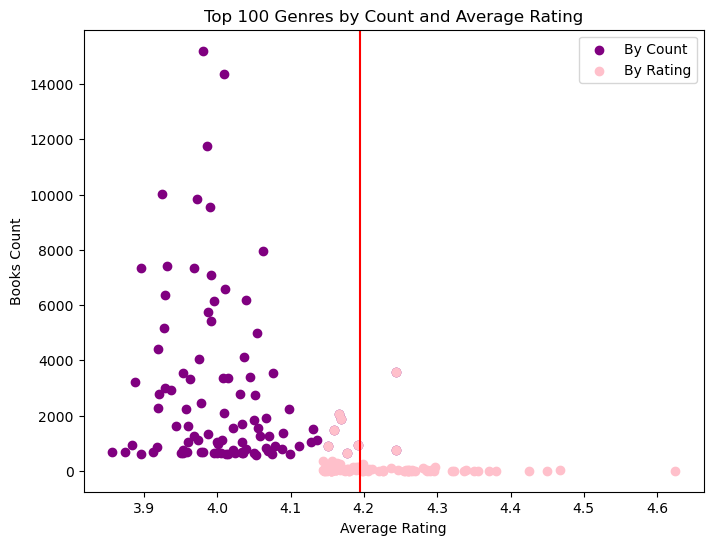

In [390]:
# Top 100 genres by count and average rating for most_listed_genres and most_rated_genres
top_counts = most_listed_genres.sort_values(by='counts', ascending=True).head(100)
top_ratings = most_rated_genres.sort_values(by='average_rating', ascending=True).head(100)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(top_counts['average_rating'], top_counts['counts'], color='purple', label='By Count')
plt.scatter(top_ratings['average_rating'], top_ratings['counts'], color='pink', label='By Rating')
plt.legend()

# Add vertical line at the average rating boundary
avg_rating_boundary = (top_counts['average_rating'].max() + top_ratings['average_rating'].min()) / 2
plt.axvline(x=avg_rating_boundary, color='red')

plt.title('Top 100 Genres by Count and Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Books Count')
plt.show()


### Awards

Top awards ranked by the number of books of each type

In [336]:
# create an empty dataframe with awards as rows
award_counts = pd.DataFrame(index=awards_columns)

# add 'counts' column to dataframe
award_counts['counts'] = 0

# loop through each award and count the number of books
for award in awards_columns:
    try:
        award_counts.at[award, 'counts'] = gr_data[award].sum()
    except:
        pass

# Sort by count
award_counts.sort_values(by='counts', ascending=False, inplace=True)

In [338]:
award_counts.head(10)

,counts
Singular Award (4-8),3708
Unique Award (1),3388
Frequently Awarded Literary Prizes (9-15),2654
"Uncommon Award (2,3)",2653
Dorothy Canfield Fisher Children's Book Award Nominee,319
Lincoln Award Nominee,246
Rhode Island Teen Book Award Nominee,217
Goodreads Choice Award Nominee for Young Adult Fiction,164
Carnegie Medal Nominee,160
Goodreads Choice Award Nominee for Romance,147


In [396]:
display(f"There were 5.831 unique awards listed in the original dataset. Now, the reduced list of awards contains a total of {len(award_counts)}")

'There were 5.831 unique awards listed in the original dataset. Now, the reduced list of awards contains a total of 239'

As many awards were given to only one or a few books, I created the first four groups shown in the previous list for all the awards with a count of 15 books or less.

Top rated genres

In [339]:
award_counts['average_rating'] = 0

for award in awards_columns:
    try:
        # select only rows where the genre has a value of 1
        award_data = gr_data[gr_data[award] >= 1]
        
        # check if there are any books with this genre
        if award_data.shape[0] != 0:
            # get the average rating for this genre
            avg_rating = award_data['rating'].mean()
            award_counts.at[award, 'average_rating'] = avg_rating
    except:
        pass
    
award_counts.sort_values(by='average_rating', ascending=False, inplace=True)

In [340]:
award_counts.head(10)

,counts,average_rating
David Gemmell Legend Award Nominee for Best Fantasy Novel,29,4.286207
California Young Readers Medal Nominee for Primary,18,4.268889
David Gemmell Ravenheart Award Nominee for Best Fantasy Cover Art,20,4.241000
National Book Award for Nonfiction,17,4.200588
Goodreads Choice Award Nominee for Middle Grade & Children's,127,4.197402
Goodreads Choice Award Nominee for Romance,147,4.192313
Goodreads Choice Award Nominee for Graphic Novels & Comics,65,4.188615
Pulitzer Prize for General Nonfiction,31,4.186774
RITA Award by Romance Writers of America Nominee for Romantic Suspense,29,4.183793
Cornelius Ryan Award,15,4.183333


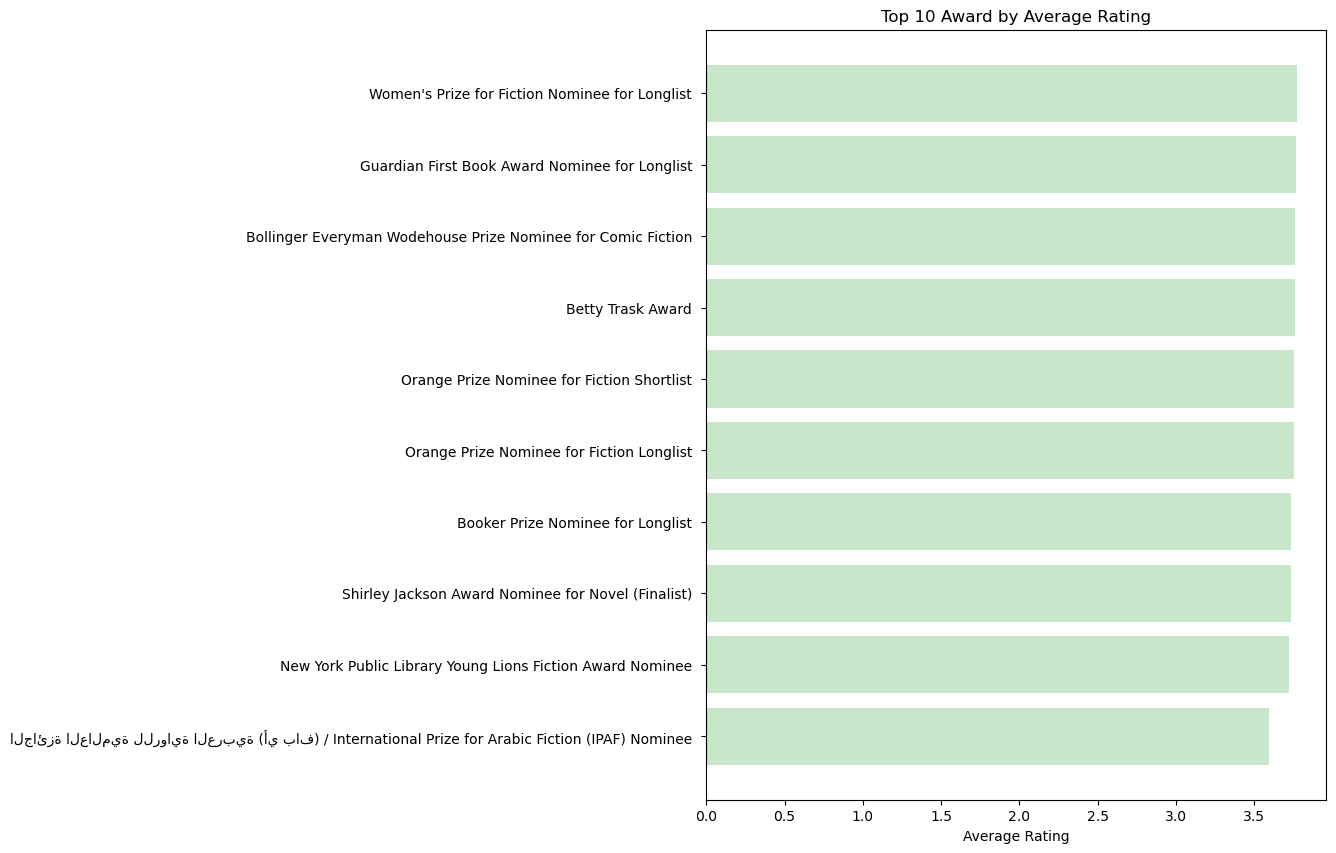

In [397]:
# get the top 10 genres by average rating
top_awards = award_counts.sort_values(by='average_rating', ascending=True).head(10)

# create a horizontal bar plot
plt.figure(figsize=(8, 10))
plt.barh(top_awards.index, top_awards['average_rating'], color='#C8E6C9')
plt.title('Top 10 Award by Average Rating')
#plt.ylabel('Award')
plt.xlabel('Average Rating')
plt.show()


In [352]:
# Sort by count
award_counts.sort_values(by='counts', ascending=False, inplace=True)
award_counts.head(10)

,counts,average_rating
Singular Award (4-8),3708,3.984289
Unique Award (1),3388,4.013399
Frequently Awarded Literary Prizes (9-15),2654,3.978278
"Uncommon Award (2,3)",2653,4.003530
Dorothy Canfield Fisher Children's Book Award Nominee,319,3.953292
Lincoln Award Nominee,246,3.980447
Rhode Island Teen Book Award Nominee,217,3.975392
Goodreads Choice Award Nominee for Young Adult Fiction,164,4.002988
Carnegie Medal Nominee,160,3.907125
Goodreads Choice Award Nominee for Romance,147,4.192313


/Users/albertlleidaestival/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 26143 (\N{CJK UNIFIED IDEOGRAPH-661F}) missing from current font.

/Users/albertlleidaestival/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 38642 (\N{CJK UNIFIED IDEOGRAPH-96F2}) missing from current font.

/Users/albertlleidaestival/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 36062 (\N{CJK UNIFIED IDEOGRAPH-8CDE}) missing from current font.



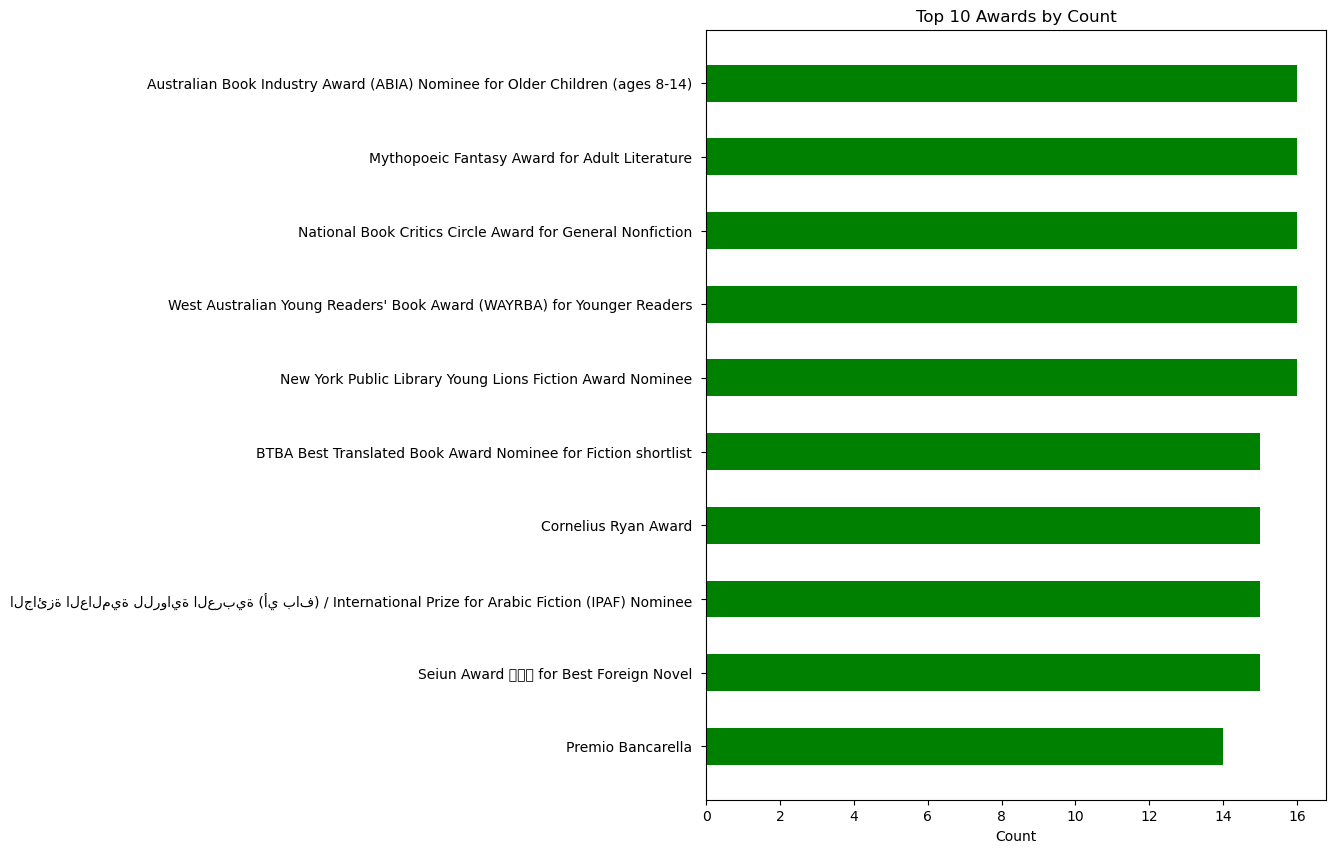

In [398]:
# Top 10 awards by count
top_awards = award_counts.sort_values(by='counts', ascending=True).head(10)

# Horizontal bar plot
plt.figure(figsize=(8, 10))
plt.barh(top_awards.index, top_awards['counts'], height=0.5, color='green')
plt.title('Top 10 Awards by Count')
plt.xlabel('Count')
#plt.ylabel('Award')
plt.show()

Scatter Plot:

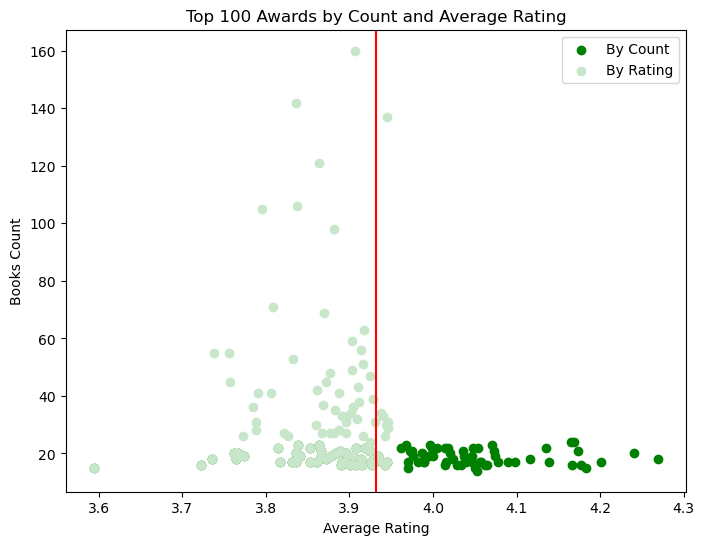

In [378]:
# Top 100 awards by count and average rating
top_counts = award_counts.sort_values(by='counts', ascending=True).head(100)
top_ratings = award_counts.sort_values(by='average_rating', ascending=True).head(100)

# Scatter plot with different colors for each dataframe
plt.figure(figsize=(8, 6))
plt.scatter(top_counts['average_rating'], top_counts['counts'], color='green', label='By Count')
plt.scatter(top_ratings['average_rating'], top_ratings['counts'], color='#C8E6C9', label='By Rating')

# Add vertical line at midpoint of largest rating in top_counts and smallest rating in top_ratings
midpoint = (top_counts['average_rating'].max() + top_ratings['average_rating'].min()) / 2
plt.axvline(x=midpoint, color='red')

plt.legend()
plt.title('Top 100 Awards by Count and Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Books Count')
plt.show()


We can observe the same trend with 'genres': books that receive more 'rating' votes tend to have a lower average rating. Additionally, the absolute difference between the counts may also reduce the efficiency of these features as predictors.

Regarding regression models applied in next steps, it's worth noting that although most awards are treated as categorical features (having or not having the award, 1 or 0), the binned and aggregated awards will be considered as numerical.

##### Different approach to Stars rating

In [257]:
# Rating according to the number of counts for each star rating
stars = gr_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings',
                 '2_stars_num_ratings', '1_star_num_ratings', 'rating']]

# Sort by rating decreasing
stars = stars.sort_values('rating', ascending=False)

stars.head(10)

,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,rating
20098,0,0,0,0,0,5.0
23633,5,0,0,0,0,5.0
33702,5,0,0,0,0,5.0
17278,0,0,0,0,0,5.0
20417,0,0,0,0,0,5.0
17258,0,0,0,0,0,5.0
20423,0,0,0,0,0,5.0
17243,0,0,0,0,0,5.0
33676,0,0,0,0,0,5.0
20439,0,0,0,0,0,5.0


In [258]:
# Books with rating = 5 but 0 counts in stars
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']
filtered = gr_data[votes == 0]
result = filtered[filtered['rating'] == 5]
print(f"There are {len(result)} books with a rating of 5 and no count ratings in any of the star categories.")

There are 526 books with a rating of 5 and no count ratings in any of the star categories.


In [259]:
# Books with 0 counts in stars
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']
filtered = gr_data[votes == 0]
print(f"There are {len(filtered)} books with no count star ratings.")

There are 1059 books with no count star ratings.


In [260]:
# Sum of all votes (5 to 1 stars) for each book
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']

# Filter the DataFrame based on sum of votes > 500
filtered_data = gr_data[votes > 500]

# Count the number of books in the filtered DataFrame
num_books = len(filtered_data)

# Print the result
print(f"There are {num_books} books with a sum of votes greater than 500.")


There are 35888 books with a sum of votes greater than 500.


In [261]:
# Sum of all votes (5 to 1 stars) for each book
total_votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']
total_votes_sorted = votes.sort_values()
total_votes_sorted

22398          0
35787          0
28063          0
24517          0
28078          0
          ...   
27       3775504
2        4501075
4        4964519
0        6376780
32       7048471
Length: 48655, dtype: int64

In [262]:
# Data from books with > 500 counts in star number of ratings

# Sum of all votes (5 to 1 stars) for each book
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']

# Filter the dataframe based on sum of votes > 500
filtered_data = gr_data[votes > 500]

# Count the number of books in the filtered dataframe
num_books = len(filtered_data)

# Extract the ratings for the filtered books
filtered_ratings = filtered_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings',                                  '2_stars_num_ratings', '1_star_num_ratings', 'rating']]

filtered_ratings = filtered_ratings.sort_values('rating', ascending=False)

print(f"There are {num_books} books with a sum of votes greater than 500.")
filtered_ratings.head(10)


There are 35888 books with a sum of votes greater than 500.


,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,rating
2448,497,2,2,0,3,4.96
7545,777,60,15,3,6,4.86
253,30247,3561,782,167,136,4.82
24903,10828,2020,293,38,15,4.79
9270,3176,300,107,42,33,4.79
2708,10945,1293,408,114,108,4.78
6834,44933,5566,1417,333,500,4.78
2653,9384,1551,356,74,37,4.77
6517,6560,1185,256,40,28,4.76
26633,592,76,23,7,6,4.76


In [263]:
# Filter data based on sum of star votes > 500
filtered_data = gr_data[votes > 500].copy()

# Count the number of books in the filtered data
num_books = len(filtered_data)

# Extract the ratings for the filtered books
filtered_ratings = filtered_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings', 'rating']]

# New column with the total votes for each book
filtered_ratings['total_votes'] = filtered_ratings.sum(axis=1)

# Sort by rating in descending order
filtered_ratings = filtered_ratings.sort_values('rating', ascending=False)

filtered_ratings = filtered_ratings[['total_votes','rating']]

print(f"There are {num_books} books with a sum of votes greater than 500.")
filtered_ratings.head(10)

There are 35888 books with a sum of votes greater than 500.


/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_1570/3093717774.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,total_votes,rating
2448,508.96,4.96
7545,865.86,4.86
253,34897.82,4.82
24903,13198.79,4.79
9270,3662.79,4.79
2708,12872.78,4.78
6834,52753.78,4.78
2653,11406.77,4.77
6517,8073.76,4.76
26633,708.76,4.76


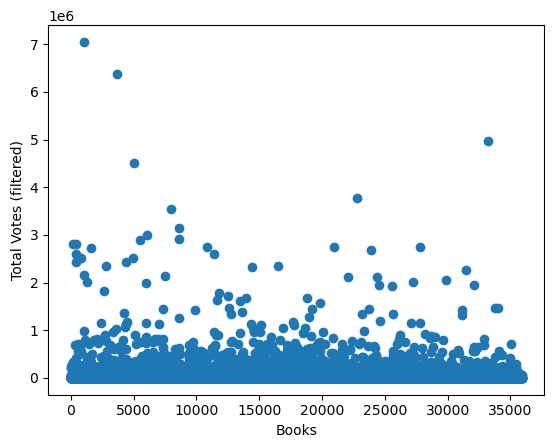

In [264]:
plt.scatter(range(len(filtered_ratings)), filtered_ratings['total_votes'])
plt.xlabel('Books')
plt.ylabel('Total Votes (filtered)')
plt.show()


In [265]:
# Filter books with a rating of 3 or higher
high_rated_books = filtered_ratings[filtered_ratings['rating'] >= 3]

# Count the number of high-rated books
num_high_rated_books = len(high_rated_books)

print(f"There are {num_high_rated_books} books with a rating of 3 or higher.")

There are 35837 books with a rating of 3 or higher.


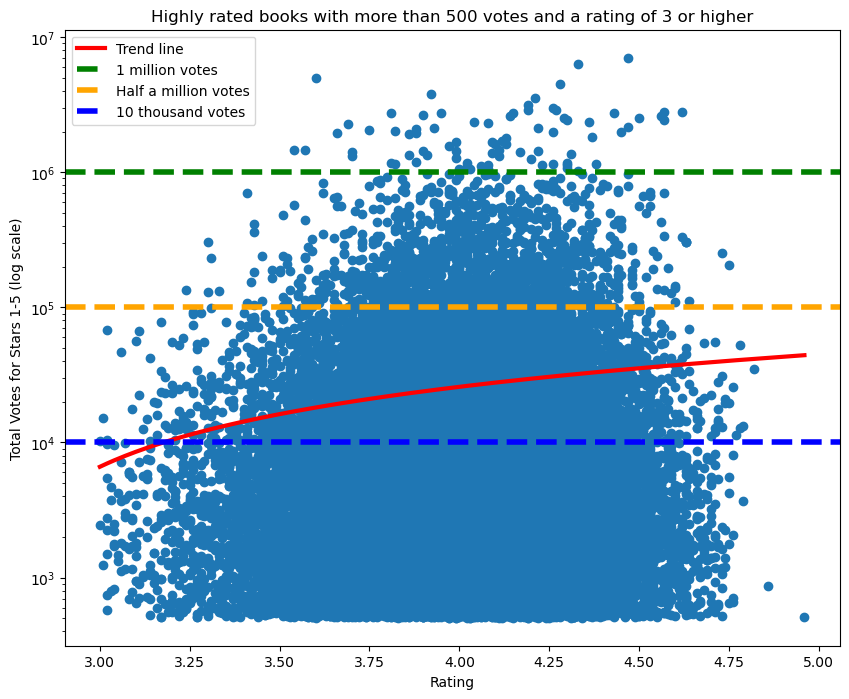

In [266]:
from sklearn.linear_model import LinearRegression

# Filter books with a total of more than 500 votes and a rating of 3 or higher
highly_voted_books = filtered_ratings[(filtered_ratings['total_votes'] > 500) & (filtered_ratings['rating'] >= 3)]

# Sort by rating in descending order
highly_voted_books = highly_voted_books.sort_values('rating', ascending=False)

# Plot the chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(highly_voted_books['rating'], highly_voted_books['total_votes'])
ax.set_xlabel('Rating')
ax.set_ylabel('Total Votes for Stars 1-5 (log scale)')
ax.set_title('Highly rated books with more than 500 votes and a rating of 3 or higher')

# Add trend line
X = highly_voted_books['rating'].values.reshape(-1, 1)
y = highly_voted_books['total_votes'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax.plot(X, reg.predict(X), color='red', linewidth=3, label='Trend line')

# Add lines for 1 million, half a million, and 10 thousand votes
ax.axhline(y=1e6, color='green', linestyle='--', linewidth=4, label='1 million votes')
ax.axhline(y=1e5, color='orange', linestyle='--', linewidth=4, label='Half a million votes')
ax.axhline(y=1e4, color='blue', linestyle='--', linewidth=4, label='10 thousand votes')

ax.set_yscale('log')  # Set y-axis to log scale
ax.legend()  # Add legend
plt.show()


Based on the scatter plot and trend line in this figure, it appears that there is a positive correlation between the number of votes a book receives and its rating. In other words, the trend line suggests that as the count of votes for a book increases, its rating tends to increase as well.

##### HEXBIN PLOT

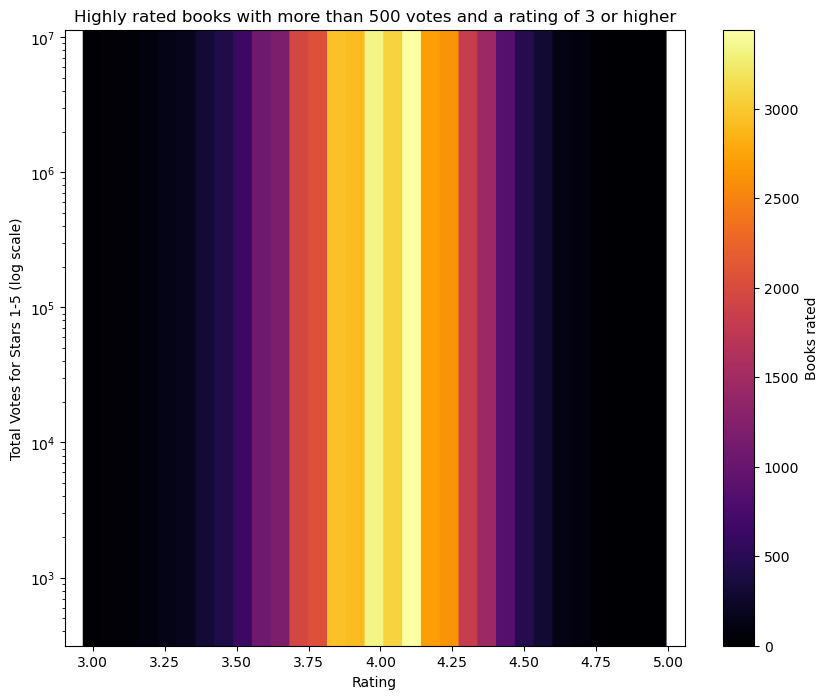

In [267]:
# Hexbin plot
fig, ax = plt.subplots(figsize=(10, 8))
hb = ax.hexbin(highly_voted_books['rating'], highly_voted_books['total_votes'], gridsize=30, cmap='inferno')
ax.set_xlabel('Rating')
ax.set_ylabel('Total Votes for Stars 1-5 (log scale)')
ax.set_title('Highly rated books with more than 500 votes and a rating of 3 or higher')

# Add colorbar
cb = fig.colorbar(hb)
cb.set_label('Books rated')

ax.set_yscale('log')  # Set y-axis to log scale
plt.show()
